# Run  impervious_parameters and prms_template_fill

#### Impervious area maps provided by NLCD are used to assign impervious percentages to each cell/RHU.

In [2]:
%matplotlib inline
import sys, os
import matplotlib.pyplot as plt
import arcpy
import geopandas
import matplotlib.image as mpimg
import ConfigParser
import numpy as np
import pandas as pd
from matplotlib import cm
from arcpy import env
python_exe = sys.executable

In [2]:
# Make sure that notebook sees the gsflow package, we need to run this cell only once. 
if False:
    import os, sys
    import subprocess
    current_dir = os.getcwd()    
#    package_location =  r"C:\Users\rniswon\Documents\Data\Git\gsflowID2447_classrepo\python_packages\pygsflow"
    package_location =  r"..\..\..\python_packages\pygsflow"
#    package_location = os.path.abspath(package_location)
#    print package_location
    os.chdir(package_location)
    cmd = python_exe + " setup.py install"
    result = subprocess.check_output(cmd, shell=True)
    os.chdir(current_dir)
 #   print result
    print os.getcwd()

C:\Users\rniswon\Documents\Data\Git\gsflowID2447_classrepo\exercises\saghen_prms\notebook


In [3]:
from gsflow import Gsflow

In [ ]:
# Set folder locations
arc_gsflow_folder=r"..\scripts"
config_file_folder=r"..\examples\sagehen"

#### GsflowArcpy uses a configuration file to set variables required by the scripts. Below the configuration file template is read, and default values are changed and written to the configuration file (".INI") read by GsflowArcpy.

In [ ]:
# Load GsflowArcpy configuration file
Config = ConfigParser.ConfigParser()
Config.read("..\examples\sagehen\sagehen_parameters_orig.ini")

#### Values set below are required for running the impervious_parameters and prms_template_fill scripts.

In [ ]:
# Set problem specific variable values for script
## PRMS Parameter
prms_parameter_folder = r"..\examples\sagehen\model\input"
single_param_file_flag = False
# single_param_file_name = "prms_inputs.param"
param_column_flag = True

In [ ]:
# Write out modified values to configuration file
cfgfile = open("..\examples\sagehen\sagehen_parameters.ini",'w')
Config.set('INPUTS','prms_parameter_folder',prms_parameter_folder)
Config.set('INPUTS','single_param_file_flag',single_param_file_flag)
Config.set('INPUTS','param_column_flag',param_column_flag)
Config.write(cfgfile)
cfgfile.close()

#### Run the GsflowArpcy script impervious_parameters.

In [ ]:
# Set and run impervious_parameters script
script = r"impervious_parameters.py"
argument = r" -i ..\examples\sagehen\sagehen_parameters.ini"
cmd=python_exe + " " + os.path.join(arc_gsflow_folder,script)
cmd = cmd + argument
os.system(cmd)

#### Below you can see that other than a few roads, there is no impervious area in Sagehen Creek Watershed.

In [ ]:
# Plot the impervious cover
fig, ax = plt.subplots(figsize=(20,8))
fn1=r"..\examples\sagehen\shapefiles\watershed_proj.shp"
fn2=r"..\examples\sagehen\hru_params\hru_params.shp"
boundary=geopandas.read_file(fn1)
hru_params=geopandas.read_file(fn2)
hru_params.plot(column="IMPERV_PCT",ax=ax,legend=True)
boundary.plot(ax=ax,color='none', edgecolor='black', linewidth=1.0)
plt.show()

#### Run the GsflowArpcy script prms_template_fill.

In [ ]:
# Set and run prms_template_fill script
script = r"prms_template_fill.py"
argument = r" -i ..\examples\sagehen\sagehen_parameters.ini"
cmd=python_exe + " " + os.path.join(arc_gsflow_folder,script)
cmd = cmd + argument
os.system(cmd)

PyGSFLOW ------ V0.0
Control file is loaded
Working on loading PRMS model ...
Parameters will be read from a file/ files...
Work on loadind the parameter files .....
Prms model is loaded .....
There are no Modflow files, PRMS model only
Writing the project files .....
Control file is written...
Parameters files are written...
Data file is written...
Modflow files are written...
pyGSFLOW is using the following executable to run the model: C:\Users\rniswon\Documents\Data\Git\gsflowID2447_classrepo\bin\gsflow.exe

C:\Users\rniswon\Documents\Data\Git\gsflowID2447_classrepo\exercises\saghen_prms\examples\sagehen\model\new_folder>C:\Users\rniswon\Documents\Data\Git\gsflowID2447_classrepo\bin\gsflow.exe C:\Users\rniswon\Documents\Data\Git\gsflowID2447_classrepo\exercises\saghen_prms\examples\sagehen\model\new_folder\sagehen.control 

               Precipitation-Runoff Modeling System (PRMS)
                       Version 5.0.0 06/01/2018

        Process            Available Modules
--------

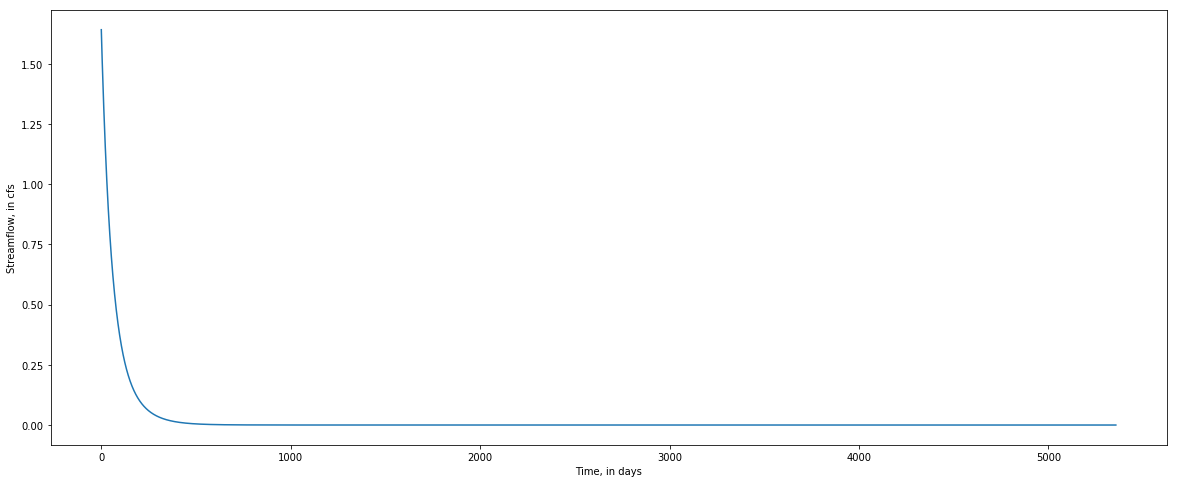

In [5]:
# Plot simulated streamflow
control_file = r"..\examples\sagehen\model\windows\sagehen.control"
gs = Gsflow(control_file=control_file)
par_val = gs.prms.parameters.get_values("slowcoef_lin")
new_par_val  =  par_val  * 0.01
gs.prms.parameters.set_values(name="slowcoef_lin",values=new_par_val)
gs.write_input(workspace=r"..\examples\sagehen\model\model_new") ## change the directory name the way you like
gs.gsflow_exe=r"C:\Users\rniswon\Documents\Data\Git\gsflowID2447_classrepo\bin\gsflow.exe"
gs.run_model()
gs.prms.get_statVar() 
fig, ax = plt.subplots(figsize=(20,8))
sim_stream_flow = gs.prms.stat.stat_df['basin_cfs_1'].values
plt.xlabel("Time, in days")
plt.ylabel("Streamflow, in cfs")
plt.plot(sim_stream_flow)
plt.show()
